# Astropy Tutorial/Documentation
Here we will load a single fits file from the hat-p-23b observation using Astropy and plot with matplotlib.

In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from astropy.io import fits


total files loaded: 79


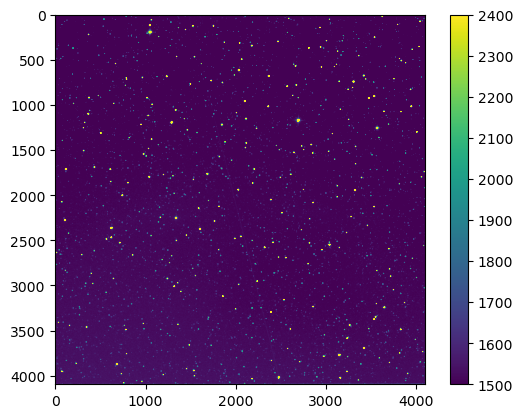

In [41]:
'''
lets loop over all the fits files in our directory and store them in a linked list.
We will import the os module to pull local FITS files into the program and the collections module to store files in a linked list.
'''
import os
import collections 

#user specific path...
directory = '/Users/spencerfreeman/Desktop/stepUp/skuban-freeman2024-07-8/processed/'
file_linkedlist = collections.deque()

for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        file = fits.open(f)
        file_linkedlist.append(file)

print('total files loaded: {0}'.format(len(file_linkedlist)))

for f in file_linkedlist:
    file_data = f[0].data

#display the sixth node of the linked list as a colored plot of pixel values
plt.imshow(file_linkedlist[5][0].data, vmin=1500, vmax=2400)
plt.colorbar()

In [37]:
file = fits.open('/Users/spencerfreeman/Desktop/stepUp/skuban-freeman2024-07-8/processed/hatp23b-0001_lrp_out.fits')
#contains HDU data header unit...
file.info()
file_data = file[0].data
print(file_data)

Filename: /Users/spencerfreeman/Desktop/stepUp/skuban-freeman2024-07-8/processed/hatp23b-0001_lrp_out.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     115   (4096, 4096)   int16 (rescales to uint16)   
[[1913 1894 1898 ... 1948 1931 1990]
 [1884 1963 1906 ... 2051 2021 1919]
 [1886 2001 1934 ... 1998 1972 2081]
 ...
 [2024 2053 2088 ... 2067 2013 2080]
 [2052 1973 2057 ... 2063 2180 1966]
 [1784 1808 2076 ... 2590 2266 1960]]


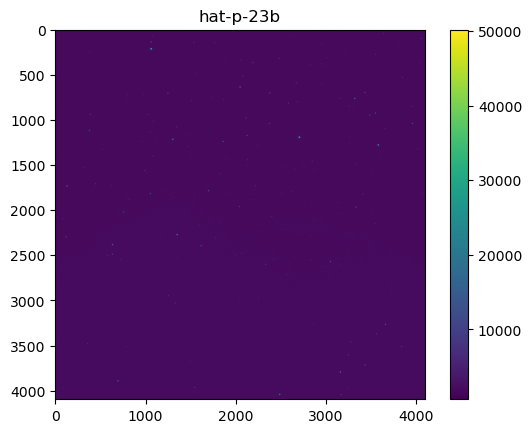

In [40]:
plt.imshow(file_data)
plt.title("hat-p-23b")
plt.colorbar()

2028
1913
645188
------------------------------------------------------------------------------------------------------
pixel values: 
479911
382716
394286
632363
375269
492338
750620
474520
496483
645188
423946
598909
464783
643692
506188
585115
329400
967227
333575
1015295
324631
525678
498599
556556
586539
524534
561519
411330
595094
446285
517953
559873
464596
470185
380255
1266715
326901
1126318
363405
527343
572174
590592
890200
398350
625295
540446
804676
328217
515986
505048
553674
346612
699702
368326
877961
763675
432346
665136
430546
697931
586226
554158
564648
532458
339667
882226
338784
580310
422207
484065
340502
514353
306597
565335
693398
304796
511917
620691
575459
------------------------------------------------------------------------------------------------------
Total Points: 
79


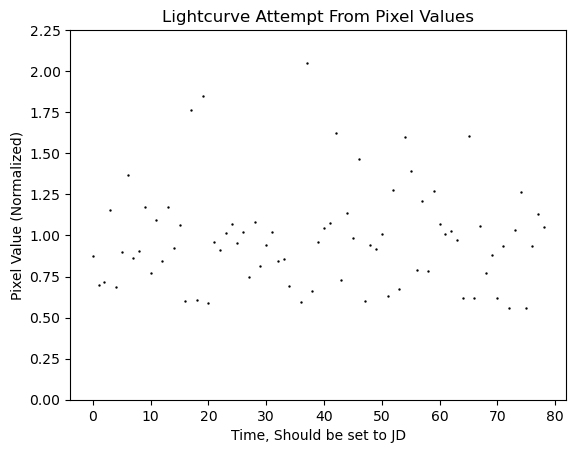

In [ ]:
import astropy.wcs.utils as awu

#skycoord_to_pixel converts a wcs header into a numpy array that stores the specific pixel values.
#hatp23_pix = awu.skycoord_to_pixel()
#seems as though the pixel coordinate system in astroimagej is different than that of the astropy library, see scale on last output. must be mindful of this when defining values.
xcoord = 2390
ycoord = 2063
pix = 18
#the star is roughly 15x15 pixels (from AIJ), hence we will sum the surrounding pixel values
print(file_data[2405][2025])
print(file_data[0][0])

#sum the target star pixel values, ranges based on aij but should be pulled from image header.
def sum_pixels(x_pix, y_pix, pixel, file_data):
    pix_sum = 0
    for i in range(x_pix, x_pix + pixel):
        for j in range(y_pix, y_pix + pixel):
            pix_sum = pix_sum + file_data[i][j]
            i=i+1
        j=j+1
    print(pix_sum)
    return(pix_sum)
    
sum_pixels(xcoord, ycoord, pix, file_data)

pixel_value_array = np.empty([len(file_linkedlist)])

print("------------------------------------------------------------------------------------------------------")
print("pixel values: ")
i=0
for f in file_linkedlist:
    file_pix_data = f[0].data
    pixel_value_array[i] = sum_pixels(xcoord, ycoord, pix, file_pix_data)
    i = i+1
print("------------------------------------------------------------------------------------------------------")

print("Total Points: ")
print(i)

x = np.linspace(0, 78, 79)
fig, ax = plt.subplots()
ax.scatter(x, pixel_value_array/np.average(pixel_value_array), s=.5, color='black')
ax.set_title("Lightcurve Attempt From Pixel Values ()")
ax.set_ylabel("Pixel Value (Normalized)")
ax.set_xlabel("Time, Should be set to JD")
ax.set_ylim(0, 2.25)
plt.show()

### Lightkurve Produced with AstroImageJ Pipeline
<img src="../static/hatp23bCURVE.png" alt="lightkurve" width="600"/>

Attempt to load our WCS from file to then pass to the skycoord_to_pixel method, this needs to be worked on.

all code from documentation.

In [ ]:
from astropy import wcs
def load_wcs_from_file(filename):
    # Load the FITS hdulist using astropy.io.fits
    hdulist = fits.open(filename)

    # Parse the WCS keywords in the primary HDU
    w = wcs.WCS(hdulist[0].header)

    # Print out the "name" of the WCS, as defined in the FITS header
    print(w.wcs.name)

    # Print out all of the settings that were parsed from the header
    w.wcs.print_contents()

    # Three pixel coordinates of interest.
    # Note we've silently assumed an NAXIS=2 image here.
    # The pixel coordinates are pairs of [X, Y].
    # The "origin" argument indicates whether the input coordinates
    # are 0-based (as in Numpy arrays) or
    # 1-based (as in the FITS convention, for example coordinates
    # coming from DS9).
    pixcrd = np.array([[0, 0], [24, 38], [45, 98]], dtype=np.float64)

    # Convert pixel coordinates to world coordinates
    # The second argument is "origin" -- in this case we're declaring we
    # have 0-based (Numpy-like) coordinates.
    world = w.wcs_pix2world(pixcrd, 0)
    print(world)

    # Convert the same coordinates back to pixel coordinates.
    pixcrd2 = w.wcs_world2pix(world, 0)
    print(pixcrd2)

    # These should be the same as the original pixel coordinates, modulo
    # some floating-point error.
    assert np.max(np.abs(pixcrd - pixcrd2)) < 1e-6

    # The example below illustrates the use of "origin" to convert between
    # 0- and 1- based coordinates when executing the forward and backward
    # WCS transform.
    x = 0
    y = 0
    origin = 0
    assert w.wcs_pix2world(x, y, origin) == w.wcs_pix2world(x + 1, y + 1, origin + 1)

load_wcs_from_file('/Users/spencerfreeman/Desktop/stepUp/skuban-freeman2024-07-8/processed/hatp23b-0001_lrp_out.fits')


[[306.46267848  17.01802788]
 [306.45918202  17.01322776]
 [306.45595964  17.00554903]]
[[-1.46428647e-10 -6.25277607e-11]
 [ 2.40000000e+01  3.80000000e+01]
 [ 4.50000000e+01  9.80000000e+01]]
       flag: 137
      naxis: 2
      crpix: 0x14465b800
               2048.5       2048.5    
         pc: 0x14467f440
    pc[0][]:  -0.00013008  -5.6458e-06
    pc[1][]:   5.6997e-06  -0.00013005
      cdelt: 0x14467f460
               1.0000       1.0000    
      crval: 0x14467fef0
               306.17       16.764    
      cunit: 0x14467fe60
             "deg"
             "deg"
      ctype: 0x144680700
             "RA---TAN-SIP"
             "DEC--TAN-SIP"
    lonpole: 180.000000
    latpole: 16.763624
    restfrq: 0.000000
    restwav: 0.000000
        npv: 0
     npvmax: 0
         pv: 0x0
        nps: 0
     npsmax: 0
         ps: 0x0
         cd: 0x14467ff00
    cd[0][]:  -0.00013008  -5.6458e-06
    cd[1][]:   5.6997e-06  -0.00013005
      crota: 0x14467ff20
               0.0000

_cname: 0x144680790  (= cname)
    m_crder: 0x14467ffd0  (= crder)
    m_csyer: 0x14467ffe0  (= csyer)
    m_czphs: 0x14467fff0  (= czphs)
    m_cperi: 0x144680000  (= cperi)
      m_aux: 0x0  (= aux)
      m_tab: 0x0  (= tab)
      m_wtb: 0x0  (= wtb)

   lin.*
       flag: 137
      naxis: 2
      crpix: 0x14465b800
               2048.5       2048.5    
         pc: 0x14467f440
    pc[0][]:  -0.00013008  -5.6458e-06
    pc[1][]:   5.6997e-06  -0.00013005
      cdelt: 0x14467f460
               1.0000       1.0000    
     dispre: 0x0
     disseq: 0x0
piximg[0][]:  -0.00013008  -5.6458e-06
piximg[1][]:   5.6997e-06  -0.00013005
imgpix[0][]:  -7672.8       333.09    
imgpix[1][]:  -336.27      -7674.6    
    i_naxis: 2
      unity: 0
     affine: 1
     simple: 0
        err: 0x0
     tmpcrd: 0x11444e310
     m_flag: 0
    m_naxis: 0
    m_crpix: 0x0
       m_pc: 0x0
    m_cdelt: 0x0
   m_dispre: 0x0
   m_disseq: 0x0

   cel.*
      flag: 137
     offset: 0
       phi0:  0.000000
   